# Generalized DLM

In [14]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
from scipy import stats
from pybats.analysis import *
from pybats.point_forecast import *
from pybats.plot import *
from pybats.shared import load_sales_example2

### Trend & exogenous regressor

##### Load data

In [4]:
ds = pd.read_csv(csv_path + 'time_series/sales_adv.csv')
ds.head()

,sales,adv
0,15,12.0
1,16,20.5
2,18,21.0
3,27,15.5
4,21,15.3


In [6]:
Y = ds['sales'].values
X = ds['adv'].values.reshape(-1,1)

fcst_hor = 1                                               
fcst_start = 15                                 
fcst_end = 35           

##### Build model

In [9]:
model, samples = analysis(Y, X, family="poisson", forecast_start=fcst_start, forecast_end=fcst_end, k=fcst_hor, prior_length=6, rho=.5, deltrend=0.95, delregn=0.95)

beginning forecasting


In [10]:
print(model.get_coef())

           Mean  Standard Deviation
Intercept  0.64                0.36
Regn 1     0.08                0.01


##### Plot forecast

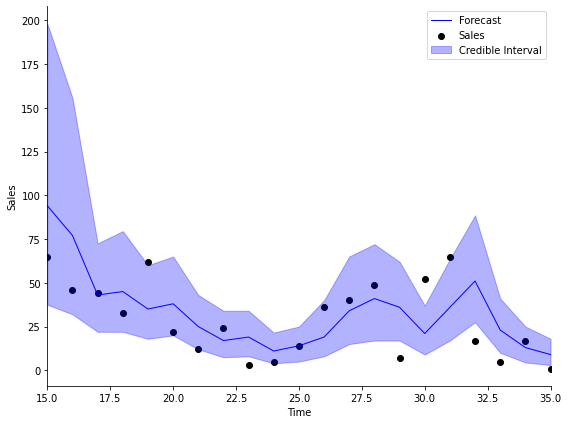

In [13]:
fcst = median(samples)                                  

fig, ax = plt.subplots(1,1, figsize=(8, 6))   
ax = plot_data_forecast(fig, ax, Y[fcst_start : fcst_end + fcst_hor], fcst, samples, dates=np.arange(fcst_start, fcst_end+1, dtype='int'))
ax = ax_style(ax, ylabel='Sales', xlabel='Time', xlim=[fcst_start, fcst_end], legend=['Forecast', 'Sales', 'Credible Interval'])

### With Seasonality

In [15]:
data = load_sales_example2()
data.head()

,Sales,Price,Promotion
Date,,,
2014-06-01,15.0,1.11,0.0
2014-06-02,13.0,2.19,0.0
2014-06-03,6.0,0.23,0.0
2014-06-04,2.0,-0.05,1.0
2014-06-05,6.0,-0.14,0.0


In [16]:
prior_length = 21   
fcst_hor = 1               
rho = 0.5           
fcst_samples = 1000  
fcst_start = pd.to_datetime('2018-01-01') 
fcst_end = pd.to_datetime('2018-06-01')   
Y = data['Sales'].values
X = data[['Price', 'Promotion']].values

In [17]:
seasPers=[7]
seasHarmonics = [[1,2,3]]

model, samples = analysis(Y, X, fcst_hor, fcst_start, fcst_end, nsamps=fcst_samples, family='poisson', seasPeriods=seasPers, seasHarmComponents=seasHarmonics,prior_length=prior_length, dates=data.index,rho=rho, ret = ['model', 'forecast'])

beginning forecasting


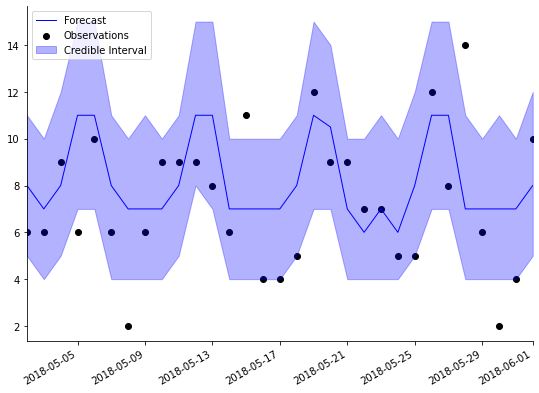

In [19]:
plot_length = 30
data_1step = data.loc[fcst_end-pd.DateOffset(30):fcst_end]
samples_1step = samples[:,-31:,0]
fig, ax = plt.subplots(1,1, figsize=(8, 6))
ax = plot_data_forecast(fig, ax, data_1step.Sales, median(samples_1step), samples_1step, data_1step.index, credible_interval=75)

### Credits & Links

https://pypi.org/project/pybats/  
https://lavinei.github.io/pybats/  
https://towardsdatascience.com/forecasting-with-bayesian-dynamic-generalized-linear-models-in-python-865587fbaf90    